# Model `AssoOpt`

An example of prediction task using `AssoOpt` with `RatioSplit`. The improvement upon `Asso` is not guaranteed.

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


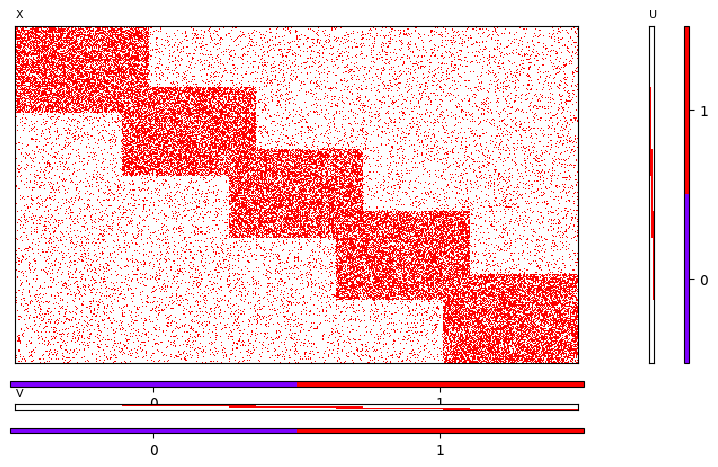

<Figure size 640x480 with 0 Axes>

In [2]:
# generating synthetic data

from PyBMF.generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)

data.show_matrix(scaling=0.5)

[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


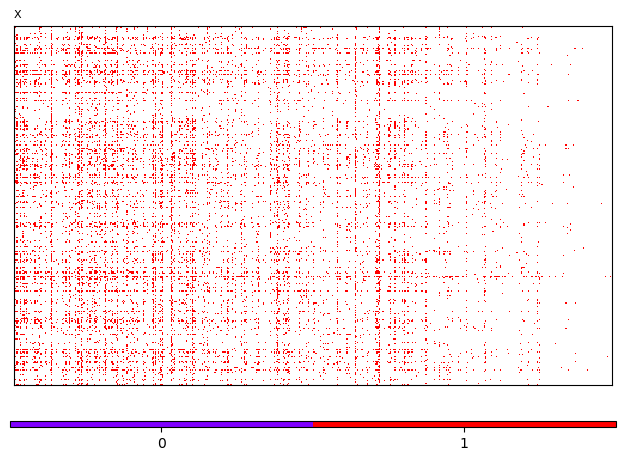

<Figure size 640x480 with 0 Axes>

In [3]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [4]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1721977071
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1721977071


[I] tau          : 0.15
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.2
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] name         : 2024-07-26 14-57-51-634085 Asso


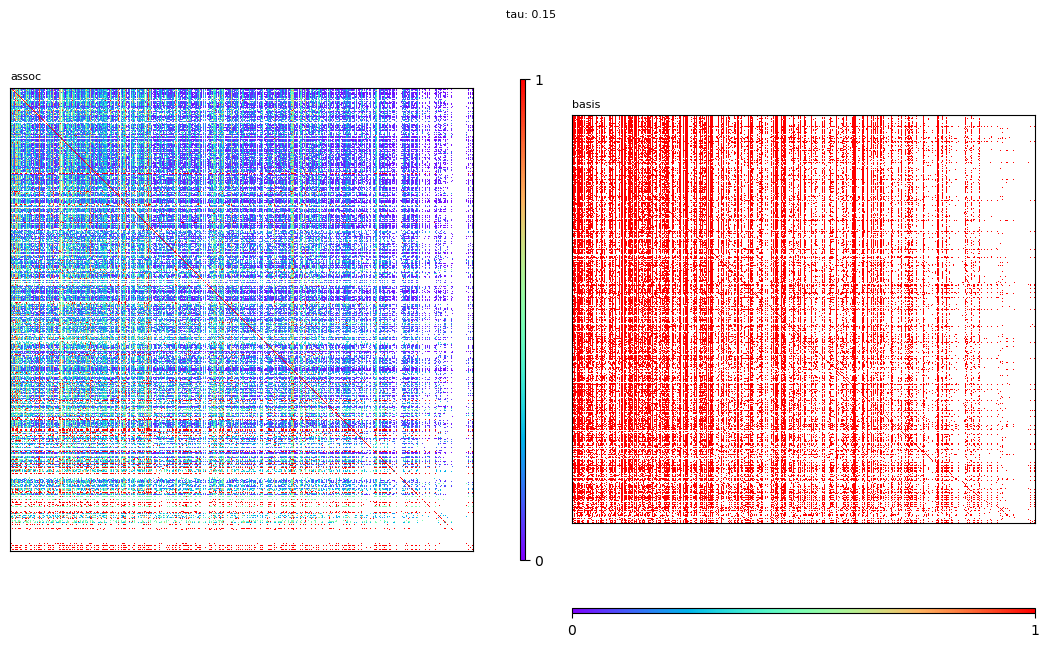

100%|██████████| 5/5 [00:11<00:00,  2.33s/it]                


[W] Stopped in advance: Reach requested factor
[I] time elapsed :  12s


<Figure size 640x480 with 0 Axes>

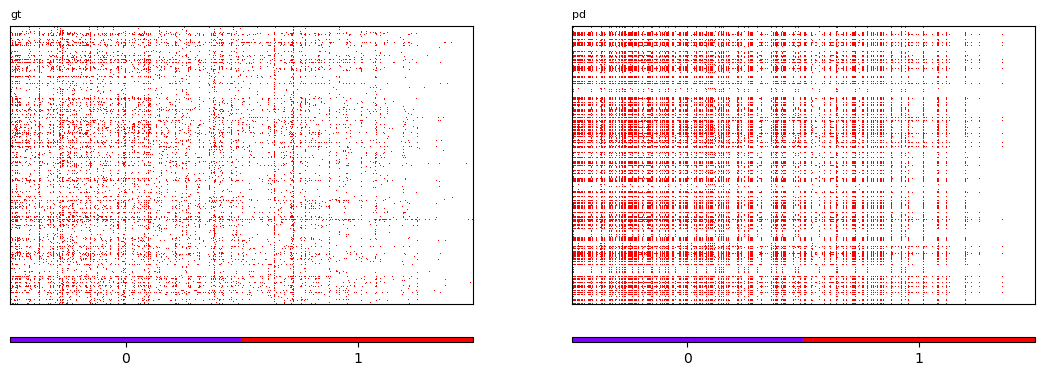

train                                       \
                              0                                        
                time  k   score score_0.5 desc_len       shape    TP   
0  26/07/24 02:57:55  0  2745.8   -1813.0  14627.0  [116, 131]  5785   
1  26/07/24 02:57:57  1  3040.8   -2370.0  15858.0    [67, 50]  6648   
2  26/07/24 02:58:00  2  3185.0   -2632.0  16599.0   [20, 197]  7063   
3  26/07/24 02:58:02  3  3277.2   -2730.0  16956.0   [23, 138]  7282   
4  26/07/24 02:58:04  4  3355.0   -2871.5  17303.0    [34, 30]  7506   

                                                                            \
                                                                             
        TPR     FP       FPR    FN       FNR       ERR       ACC    Recall   
0  0.537939   9411  0.067585  4969  0.462061  0.095867  0.904133  0.537939   
1  0.618189  11388  0.081783  4106  0.381811  0.103293  0.896707  0.618189   
2  0.656779  12327  0.088527  3691  0.343221  0.106787  0.893213  0.656779   
3  0.677143  12742  0.091507  3472  0.322857  0.108093  0.891907  0.677143   
4  0.697973  13249  0.095148  3248  0.302027  0.109980  0.890020  0.697973   

                        val                                             \
                          0                                              
  Precision        F1    TP       TPR     FP       FPR    FN       FNR   
0  0.380692  0.445857  5785  0.537939   9411  0.067585  4969  0.462061   
1  0.368596  0.461827  6648  0.618189  11388  0.081783  4106  0.381811   
2  0.364260  0.468617  7063  0.656779  12327  0.088527  3691  0.343221   
3  0.363664  0.473195  7282  0.677143  12742  0.091507  3472  0.322857   
4  0.361648  0.476435  7506  0.697973  13249  0.095148  3248  0.302027   

                                                     test                   \
                                                        0                    
        ERR       ACC    Recall Precision        F1    TP       TPR     FP   
0  0.095867  0.904133  0.537939  0.380692  0.445857  5785  0.537939   9411   
1  0.103293  0.896707  0.618189  0.368596  0.461827  6648  0.618189  11388   
2  0.106787  0.893213  0.656779  0.364260  0.468617  7063  0.656779  12327   
3  0.108093  0.891907  0.677143  0.363664  0.473195  7282  0.677143  12742   
4  0.109980  0.890020  0.697973  0.361648  0.476435  7506  0.697973  13249   

                                                                               
                                                                               
        FPR    FN       FNR       ERR       ACC    Recall Precision        F1  
0  0.067585  4969  0.462061  0.095867  0.904133  0.537939  0.380692  0.445857  
1  0.081783  4106  0.381811  0.103293  0.896707  0.618189  0.368596  0.461827  
2  0.088527  3691  0.343221  0.106787  0.893213  0.656779  0.364260  0.468617  
3  0.091507  3472  0.322857  0.108093  0.891907  0.677143  0.363664  0.473195  
4  0.095148  3248  0.302027  0.109980  0.890020  0.697973  0.361648  0.476435

<Figure size 640x480 with 0 Axes>

In [5]:
from PyBMF.models import Asso

k = 5
tau = 0.15
w_fp = 0.2

model_asso = Asso(k=k, tau=tau, w_fp=w_fp)
model_asso.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=False, save_model=False)

In [6]:
from PyBMF.models import AssoOpt

model_assoopt = AssoOpt(model=model_asso, w_fp=w_fp)
model_assoopt.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=False, save_model=False)

[I] model        : <PyBMF.models.Asso.Asso object at 0x00000215983C2850>
[I] w_fp         : 0.2
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] U, V existed. Skipping initialization.
[I] name         : 2024-07-26 14-58-05-139572 AssoOpt


100%|██████████| 300/300 [03:22<00:00,  1.48it/s]


[I] Exhaustive search finished in 203.4975038s.


AttributeError: 'AssoOpt' object has no attribute 'w'

: 